### Random Sample Imputation

When to use - Only when data are missing completely at random

In [1]:
import pandas as pd
df=pd.read_csv(r'F:\Data Set\titanic.csv', usecols=['Age','Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [7]:
df['Age'].dropna().sample()

192    19.0
Name: Age, dtype: float64

In [9]:
df['Age'].isnull().sum()

177

In [10]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [18]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)    
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [15]:
median=df.Age.median()

In [16]:
median

28.0

In [19]:
impute_nan(df,"Age",median)

In [21]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

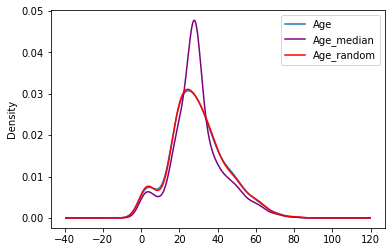

In [27]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='purple')
df.Age_random.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#### Advantages
1. Easy to implement
2. There is less distortion in variance

#### Disadvantage
1. every where randomness will not work

#### Capturing NAN values with a new feature

It works well if data is not missing completely at Random

In [28]:
import pandas as pd
df=pd.read_csv(r'F:\Data Set\titanic.csv', usecols=['Age','Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [30]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [31]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [33]:
df.Age.median()

28.0

In [36]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.head(500)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
495,0,28.0,14.4583,1
496,1,54.0,78.2667,0
497,0,28.0,15.1000,1
498,0,25.0,151.5500,0


#### Advantages
1. Easy to implement
2. Captures importance of missing values

#### Disadvantages
1. Creating additional features(curse of dimensionality)

### End of Distribution imputation

In [37]:
import pandas as pd
df=pd.read_csv(r'F:\Data Set\titanic.csv', usecols=['Age','Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

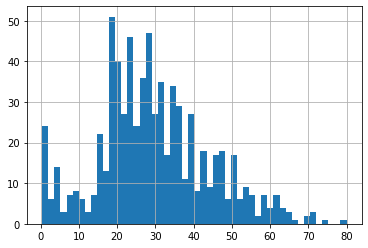

In [38]:
df.Age.hist(bins=50)

In [49]:
extreme=df.Age.mean()+3*df.Age.std()
extreme

68.42067214450208

C:\Users\SHIVAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

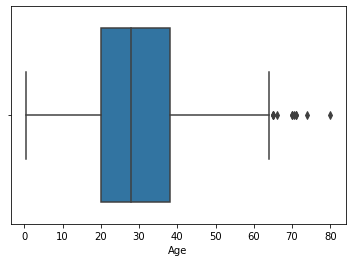

In [43]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [45]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [47]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [53]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

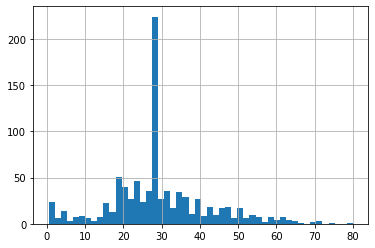

In [54]:
df['Age'].hist(bins=50)

<AxesSubplot:>

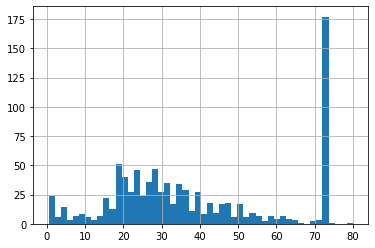

In [55]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\SHIVAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

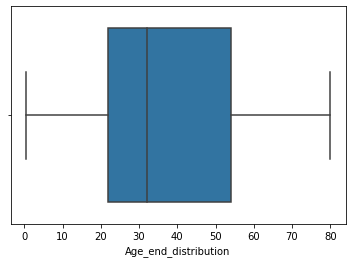

In [56]:
sns.boxplot('Age_end_distribution',data=df)

#### Advantages
1. Easy to implement
2. Captures importance of missingness if there is one

#### Disadvantages
1. Distorts the original distribution
